/tmp/ipykernel_115330/3678177485.py:55: RuntimeWarning: divide by zero encountered in divide
  out += cos(i * x)-(1/i)*(comp*cos(x)/sin(x))*sin(i*x)
/tmp/ipykernel_115330/3678177485.py:55: RuntimeWarning: invalid value encountered in multiply
  out += cos(i * x)-(1/i)*(comp*cos(x)/sin(x))*sin(i*x)
/tmp/ipykernel_115330/3678177485.py:56: RuntimeWarning: divide by zero encountered in divide
  out += (comp*cos(x)/sin(x))*y
/tmp/ipykernel_115330/3678177485.py:56: RuntimeWarning: invalid value encountered in multiply
  out += (comp*cos(x)/sin(x))*y


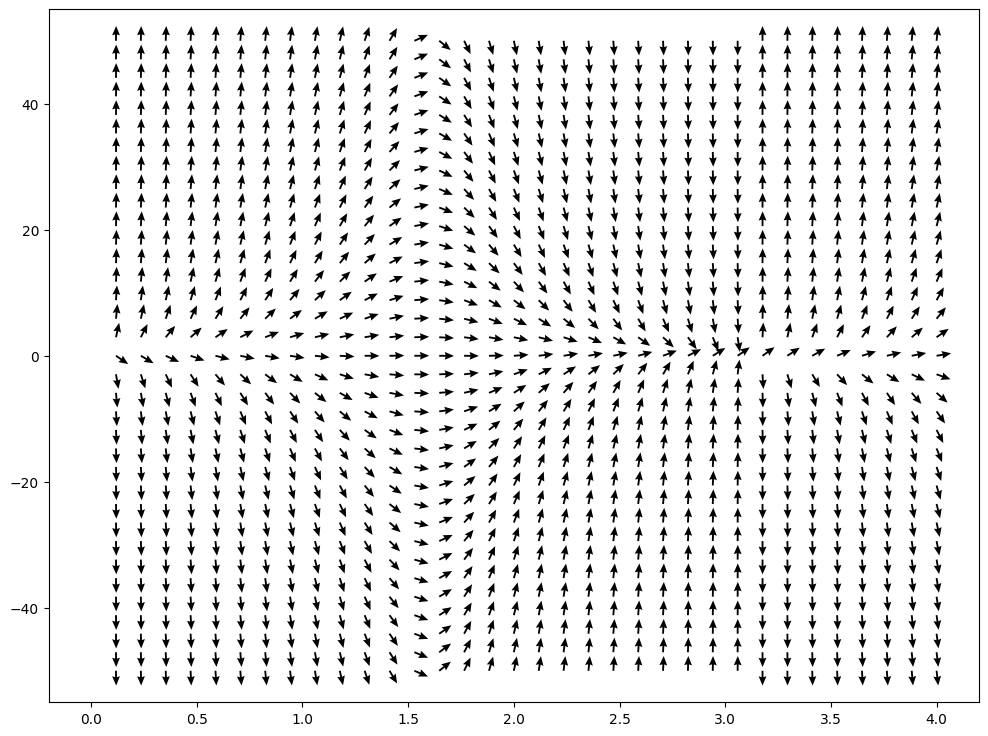

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint

def plot_df(df, size=(12,9), 
			x_grid=(0.0, 4.0, 20), 
			y_grid=(0.0, 4.0, 20), 
			show_solution=False,
			y_0=0,
            path=None):
	# df: function df(x,y)
	# size: (int, int)
	# x_grid and y_grid for mesh
	
	# figure output size
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111)
	
	# mesh grid 
    minx, maxx,	xsteps = x_grid
    miny, maxy, ysteps = y_grid
    x,y = np.meshgrid(np.linspace(minx,maxx, xsteps), np.linspace(miny, maxy, ysteps))
	
	# direction values for the vectors
    u = x-x+1
    v = 1*df(x,y)

	# normalize vectors, such that they are same size
    r = np.power(np.add(np.power(u,2), np.power(v,2)),0.5)

    # find solutions to IVP
    plt.quiver(x,y,u/r,v/r, angles="xy", headwidth=4.2, width=0.002)
    if show_solution:
        solution_steps = 101
        t = np.linspace(minx, maxx, solution_steps)
        if type(y_0) == int:
             sol = odeint(df, y_0, t, tfirst=True)
             plt.plot(t, sol)
        else:
             for y_k in y_0:
                  sol = odeint(df, y_0, t, tfirst=True)
                  plt.plot(t, sol)
		
    if path:
         plt.savefig(path, bbox_inches='tight')
    plt.show()

# Define the differential equation y'=df
def df(x,y):
    out = 0
    comp = 7
    for i in range(1,10,2):
         if i != comp:
            out += cos(i * x)-(1/i)*(comp*cos(x)/sin(x))*sin(i*x)
    out += (comp*cos(x)/sin(x))*y
    return out
	
plot_df(df, 
        x_grid=(0, 4, 35), 
        y_grid=(-50, 50, 35), 
        show_solution=False, 
        y_0=6, 
        path="example_1")

In [50]:
list(range(1,10,2))

[1, 3, 5, 7, 9]

In [18]:
import numpy as np
from numpy.fft import fft, ifft

def approximate_polynomial(coefficients, threshold):
    # Pad coefficients with zeros
    padded_coefficients = np.pad(coefficients, (0, 2**int(np.ceil(np.log2(len(coefficients)))) - len(coefficients)))
    
    # FFT transformation
    freq_domain = fft(padded_coefficients)
    
    # Remove high-frequency components (thresholding)
    freq_domain[threshold:] = 0
    
    # Inverse FFT transformation
    approximated_coefficients = ifft(freq_domain)
    
    # Extract the real part of the result
    approximated_coefficients = np.real(approximated_coefficients)
    
    return approximated_coefficients[:len(coefficients)]

# Example usage
original_coefficients = [1, 2, 3, 4, 5]
threshold = 3  # Adjust the threshold as needed

approximated_coefficients = approximate_polynomial(original_coefficients, threshold)
print("Original Coefficients:", original_coefficients)
print("Approximated Coefficients:", approximated_coefficients)


Original Coefficients: [1, 2, 3, 4, 5]
Approximated Coefficients: [1.5732233  1.78661165 2.40533009 3.24371843 2.9267767 ]
